感知机，注意去理解其求解过程，感知机求解的思路以及梯度下降算法是神经网络的基础
感知机简单，可以用于二分类问题，但是存在局限
1、数据集必须线性可分，若满足不了，那么算法会震荡，无法收敛
2、感知机甚至无法表示异或操作


In [3]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
iris = load_iris()
# 将数据集中的数据提出，变成dataFrame，然后利用四列的特征名字完善
df = pd.DataFrame(iris.data, columns=iris.feature_names)
# 新加一列label，把target数据放进来
df['label'] = iris.target

In [5]:
df.columns = [
    'sepal length', 'sepal width', 'petal length', 'petal width', 'label'
]
# 以label列为标准来计算类别数量
df.label.value_counts()

2    50
1    50
0    50
Name: label, dtype: int64

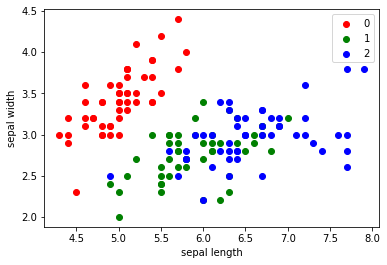

In [9]:
plt.scatter(df[:50]['sepal length'], df[:50]['sepal width'], c='r', label='0')
plt.scatter(df[50:100]['sepal length'], df[50:100]['sepal width'], c='g', label='1')
plt.scatter(df[100:]['sepal length'], df[100:]['sepal width'], c='b', label='2')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

In [13]:
# iloc的用法可以鼠标放上来看官方文档，这里是取0、1以及最后1列的前100行
# 感知机有局限，这里以二分类问题来展示，选取两维数据便于可视化
data = np.array(df.iloc[:100, [0, 1, -1]])
data_use, label = data[:,:-1], data[:,-1]
label = np.array([1 if i == 1 else -1 for i in label])

In [16]:
b1 = data[0]
a = np.ones(len(data[0])-1, dtype=np.float32)

array([5.1, 3.5, 0. ])

In [25]:
# 确保了数据线性可分，且为二分类数据
class Model:
    """
    需要能够从类里面访问的数据放在这里，可以输入学习率
    """
    def __init__(self, l_rate=0.1):
        # w为1*2的数据，因为每个数据点为1*2，两个特征
        self.w = np.ones(len(data[0])-1, dtype=np.float32)
        self.b = 0
        self.l_rate = l_rate # 学习率
        self.count = 0

    def sign(self, w, x, b):
        """
        构建超平面，二维空间中为一条直线
        :param w: 法向量
        :param x: 数据向量，和法向量同维
        :param b: 截距
        :return: 方程面房产
        """
        y = np.dot(w, x) + b
        return y

    # 梯度下降算法，基本思路为从w，b都为0的时候开始，所有点放进去遍历，进行梯度下降
    # 在把所有数据点都完成梯度下降之后，再重新遍历数据查看是否还有数据在超平面之外，若存在的话，继续梯度下降
    def fit(self, x_train, y_train):
        is_wrong = False
        while not is_wrong:
            wrong_count = 0
            for d in range(len(x_train)):
                x = x_train[d]
                y = y_train[d]
                if y * self.sign(x, self.w, self.b) <= 0:
                    self.w = self.w + self.l_rate * np.dot(y, x)
                    self.b = self.b + self.l_rate * y
                    wrong_count += 1
                    self.count += 1
            if wrong_count == 0:
                is_wrong = True
        return 'Perceptron Model!'

    def score(self):
        pass

In [27]:
perceptron = Model()
perceptron.fit(data_use, label)

1473

In [28]:
count = perceptron.count
count

1473

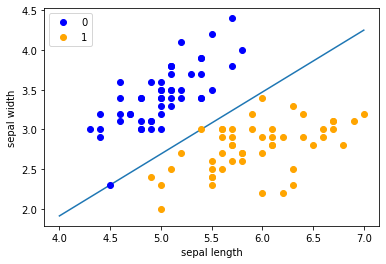

In [29]:
x_points = np.linspace(4, 7, 10)
# 把x2看为y来进行二维平面的可视化
y_ = -(perceptron.w[0] * x_points + perceptron.b) / perceptron.w[1]
plt.plot(x_points, y_)

plt.plot(data[:50, 0], data[:50, 1], 'bo', color='blue', label='0')
plt.plot(data[50:100, 0], data[50:100, 1], 'bo', color='orange', label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()


In [30]:
import sklearn
from sklearn.linear_model import Perceptron


In [31]:
sklearn.__version__

'0.22.1'

In [32]:
clf = Perceptron(fit_intercept=True,
                 max_iter=1000,
                 tol= None,   # 这个参数使得感知机在迭代的时候，获得的距离小于某个值的时候结束迭代，取消其存在可以使得迭代次数增加，也有可能过拟合
                 shuffle=True)
clf.fit(data_use, label)


Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=None,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [33]:
# w
print(clf.coef_)
# b
print(clf.intercept_)


[[ 70.7 -87.9]]
[-117.]


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
/Users/shenheng/anaconda3/envs/Py/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 40482 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/shenheng/anaconda3/envs/Py/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 23614 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/shenheng/anaconda3/envs/Py/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 33457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/shenheng/anaconda3/envs/Py/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 32447 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/shenheng/anaconda3/envs/Py/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 24615 missing from curr

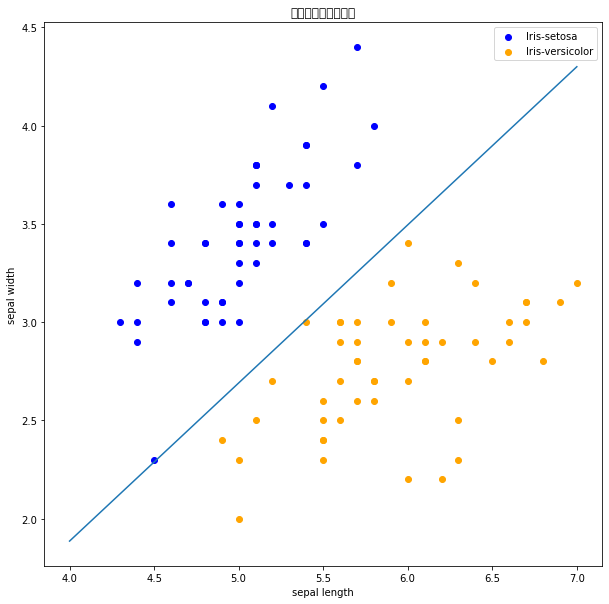

In [34]:
# 画布大小
plt.figure(figsize=(10,10))

# 中文标题
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.title('鸢尾花线性数据示例')

plt.scatter(data[:50, 0], data[:50, 1], c='b', label='Iris-setosa',)
plt.scatter(data[50:100, 0], data[50:100, 1], c='orange', label='Iris-versicolor')

# 画感知机的线
x_ponits = np.arange(4, 8)
y_ = -(clf.coef_[0][0]*x_ponits + clf.intercept_)/clf.coef_[0][1]
plt.plot(x_ponits, y_)

# 其他部分
plt.legend()  # 显示图例
plt.grid(False)  # 不显示网格
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()